### PROJECT OVERVIEW
The COVID-19 pandemic has been one of the most significant global health crises of the modern era, affecting countries worldwide in unprecedented ways. This analysis examines COVID-19 data across multiple countries to understand infection rates, mortality patterns, and vaccination progress. By analyzing this data, we can gain valuable insights into how different countries responded to the pandemic and identify patterns that might inform future public health strategies.



### BUSINESS PROBLEM
Health authorities and policymakers need data-driven insights to understand the progression of COVID-19 across different countries. This analysis aims to:
1. Compare infection and mortality rates across selected countries
2. Track vaccination campaign effectiveness
3. Identify patterns in pandemic waves
4. Provide visualizations that clearly communicate pandemic dynamics

### OBJECTIVES
1. Clean and prepare COVID-19 data for effective analysis
2. Generate descriptive statistics for key pandemic metrics
3. Create visualizations showing trends across selected countries
4. Analyze vaccination progress and its relationship to case numbers
5. Deliver insights that could inform public health decision-making

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df = pd.read_csv('owid-covid-data.csv') 
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [3]:
#check for no. of columns and rows
df.shape

(429435, 67)

In [4]:
# check the columns available
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
print(df.isnull().sum())

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64


In [6]:
# check for data types
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                   int64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [7]:
# basic statistics for numerical columns
print(df.describe())

        total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  4.118040e+05  4.101590e+05        4.089290e+05  4.118040e+05   
mean   7.365292e+06  8.017360e+03        8.041026e+03  8.125957e+04   
std    4.477582e+07  2.296649e+05        8.661611e+04  4.411901e+05   
min    0.000000e+00  0.000000e+00        0.000000e+00  0.000000e+00   
25%    6.280750e+03  0.000000e+00        0.000000e+00  4.300000e+01   
50%    6.365300e+04  0.000000e+00        1.200000e+01  7.990000e+02   
75%    7.582720e+05  0.000000e+00        3.132860e+02  9.574000e+03   
max    7.758668e+08  4.423623e+07        6.319461e+06  7.057132e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  410608.000000        409378.000000            411804.000000   
mean       71.852139            72.060873            112096.199396   
std      1368.322990           513.636567            162240.412419   
min         0.000000             0.000000                 0.000000   
25%       

In [8]:
#Data Cleaning
# Create a copy of the dataframe to avoid modifying the original
data= df.copy()
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [9]:
#convert date column to datetime
data['date'] =pd.to_datetime(data['date'])

In [10]:
selected_columns = ['date', 'country', 'cases_total', 'cases_new',
                    'deaths_total', 'deaths_new',
                    'vaccinations_total', 'vaccinated_partial', 'vaccinated_full']

In [11]:
clean_data = data.rename(columns={
    'location': 'country',
    'total_cases': 'cases_total',
    'new_cases': 'cases_new',
    'total_deaths': 'deaths_total',
    'new_deaths': 'deaths_new',
    'total_vaccinations': 'vaccinations_total',
    'people_vaccinated': 'vaccinated_partial',
    'people_fully_vaccinated': 'vaccinated_full'
})

In [12]:
selected_columns = ['date', 'country', 'cases_total', 'cases_new',
                    'deaths_total', 'deaths_new',
                    'vaccinations_total', 'vaccinated_partial', 'vaccinated_full','population']
df1 = clean_data[selected_columns]

In [13]:
df1.head()

,date,country,cases_total,cases_new,deaths_total,deaths_new,vaccinations_total,vaccinated_partial,vaccinated_full,population
0,2020-01-05,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,41128772
1,2020-01-06,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,41128772
2,2020-01-07,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,41128772
3,2020-01-08,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,41128772
4,2020-01-09,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,41128772


In [14]:
df1.shape

(429435, 10)

In [15]:
 #Handling Missing Values in Critical Columns
print(df1.isnull().sum())

date                       0
country                    0
cases_total            17631
cases_new              19276
deaths_total           17631
deaths_new             18827
vaccinations_total    344018
vaccinated_partial    348303
vaccinated_full       351374
population                 0
dtype: int64


In [16]:
critical_columns = ['cases_total', 'deaths_total', 'cases_new', 'deaths_new']

# Drop rows where date is missing (if any)
df1 = df1.dropna(subset=['date'])

In [17]:
df1[critical_columns] = df1.groupby('country')[critical_columns].ffill()

# For any remaining NaN values at the beginning of a series, fill with 0
df1[critical_columns] = df1[critical_columns].fillna(0)

# Check if we've addressed the missing values
print("Missing values in critical columns after cleaning:")
df1[critical_columns].isnull().sum()


Missing values in critical columns after cleaning:


cases_total     0
deaths_total    0
cases_new       0
deaths_new      0
dtype: int64

In [18]:
# Let's also handle vaccination data
vaccination_columns = ['vaccinations_total', 'vaccinated_partial', 'vaccinated_full']

# First, check missing values in vaccination columns
print("Missing values in vaccination columns before cleaning:")
df1[vaccination_columns].isnull().sum()

# Forward fill the vaccination data by country
df1[vaccination_columns] = df1.groupby('country')[vaccination_columns].ffill()

# For any remaining NaN values, let's check how many we have
print("Missing values in vaccination columns after forward fill:")
df1[vaccination_columns].isnull().sum()

# Since vaccinations started later in the pandemic, early dates will naturally have missing values
# Let's replace those with 0
df1[vaccination_columns] = df1[vaccination_columns].fillna(0)

Missing values in vaccination columns before cleaning:
Missing values in vaccination columns after forward fill:


In [19]:
#  cleaning results
print("Final missing values in vaccination columns:")
df1[vaccination_columns].isnull().sum()

Final missing values in vaccination columns:


vaccinations_total    0
vaccinated_partial    0
vaccinated_full       0
dtype: int64

In [20]:
# Check data types after cleaning
df1.dtypes

date                  datetime64[ns]
country                       object
cases_total                  float64
cases_new                    float64
deaths_total                 float64
deaths_new                   float64
vaccinations_total           float64
vaccinated_partial           float64
vaccinated_full              float64
population                     int64
dtype: object

In [21]:
df1.head()

,date,country,cases_total,cases_new,deaths_total,deaths_new,vaccinations_total,vaccinated_partial,vaccinated_full,population
0,2020-01-05,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772
1,2020-01-06,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772
2,2020-01-07,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772
3,2020-01-08,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772
4,2020-01-09,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772


In [22]:
 #Exploratory Data Analysis (EDA)
countries= ['Kenya','US', 'India','United Kingdom','South Africa','Australia','Germany','Qatar']

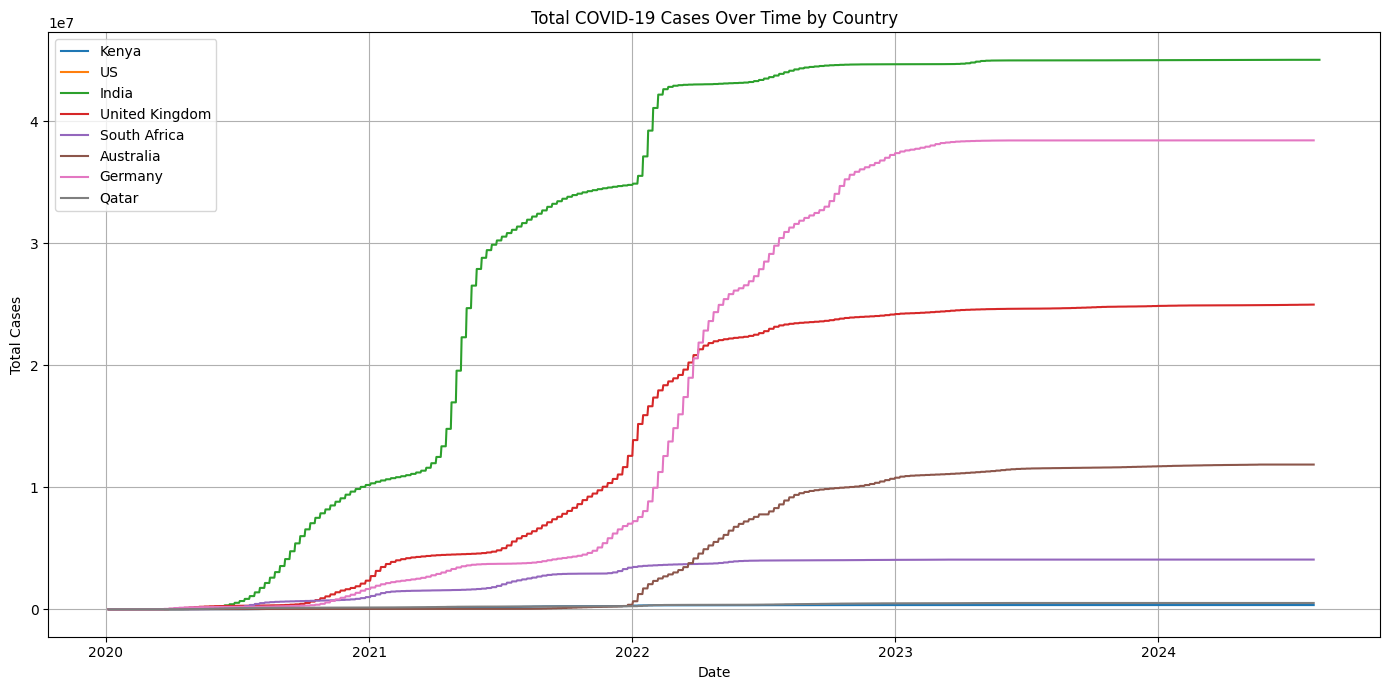

In [23]:
plt.figure(figsize=(14, 7))

for country in countries:
    df_country = df1[df1['country'] == country]
    plt.plot(df_country['date'], df_country['cases_total'], label=country)

plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases Over Time by Country')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


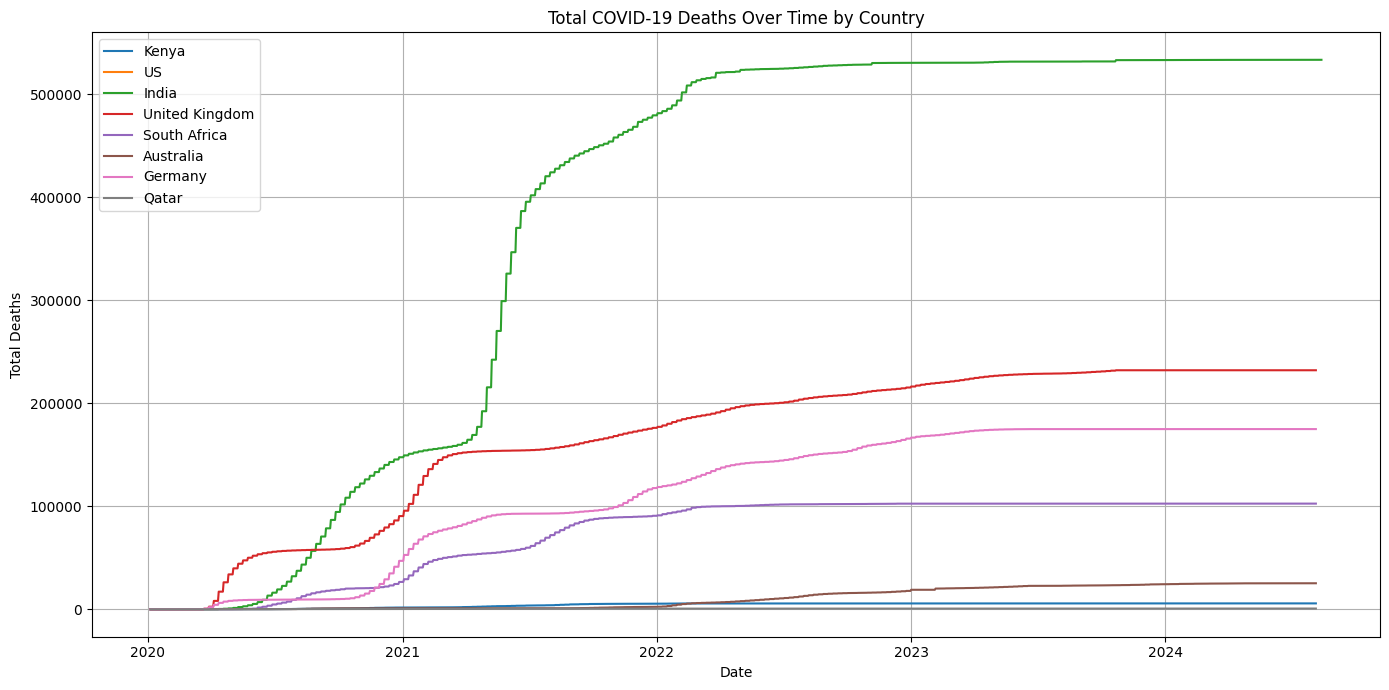

In [24]:
plt.figure(figsize=(14, 7))

for country in countries:
    df_country = df1[df1['country'] == country]
    plt.plot(df_country['date'], df_country['deaths_total'], label=country)

plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths Over Time by Country')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


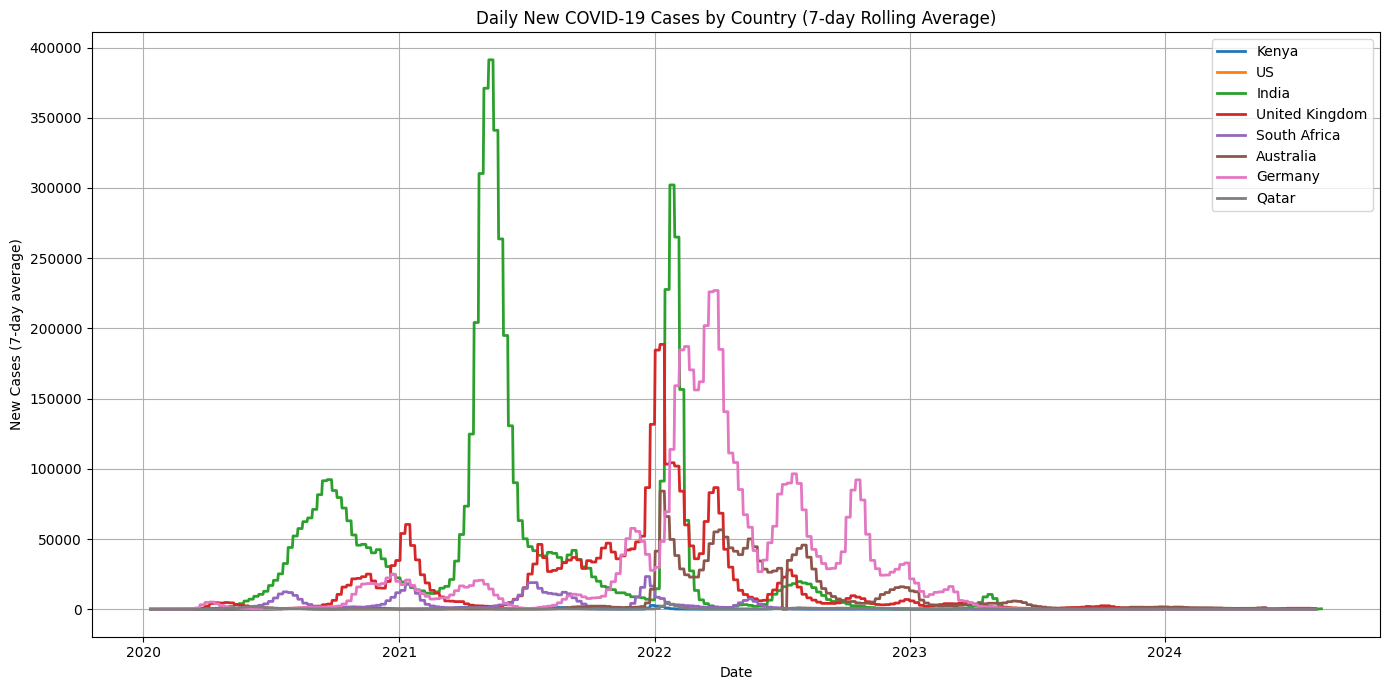

In [25]:
plt.figure(figsize=(14, 7))

for country in countries:
    df_country = df1[df1['country'] == country]
    rolling_avg = df_country['cases_new'].rolling(7).mean()
    plt.plot(df_country['date'], rolling_avg, label=country, linewidth=2)

plt.xlabel('Date')
plt.ylabel('New Cases (7-day average)')
plt.title('Daily New COVID-19 Cases by Country (7-day Rolling Average)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Interpretation:
India experienced the most dramatic surge, particularly during mid-2021, reflecting its catastrophic second wave. The United States shows multiple well-defined waves, indicating repeated spikes in infections across different periods. Countries like Kenya, Qatar, and Australia had relatively lower peaks, though still experienced noticeable wave patterns. This chart highlights both the timing and intensity of COVID-19 outbreaks, showing how the pandemic evolved differently across regions.

In [26]:
df1['death_rate'] = df1['deaths_total'] / df1['cases_total']

In [27]:
df1['death_rate_smoothed'] = df1['death_rate'].rolling(7).mean()

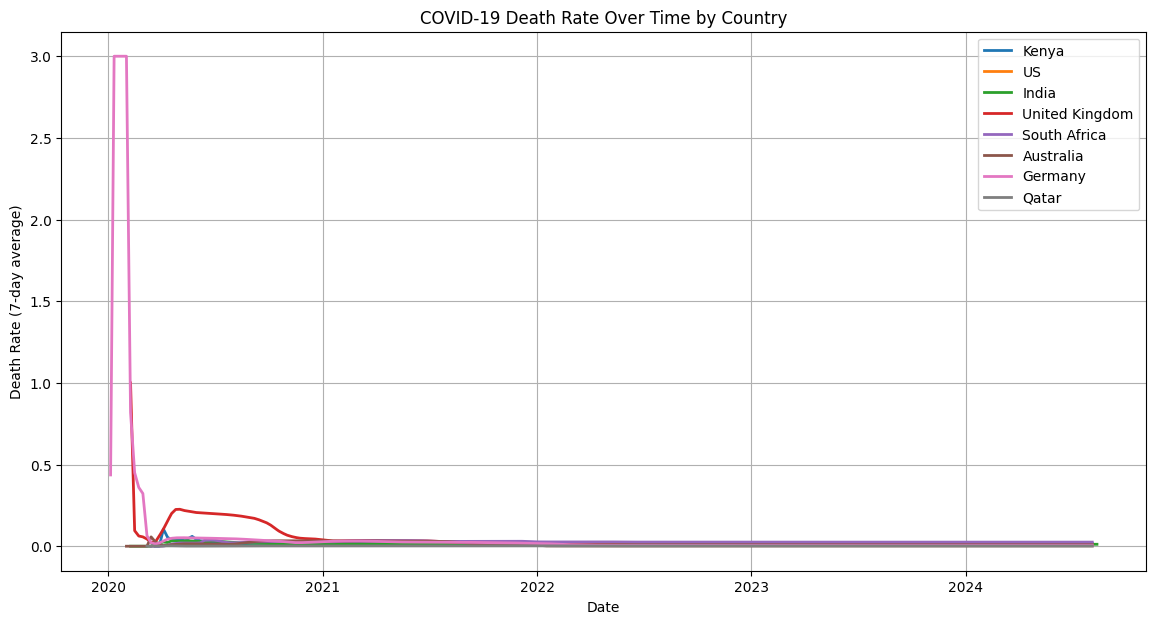

In [28]:
plt.figure(figsize=(14, 7))

for country in countries:
    df_country = df1[df1['country'] == country]
    plt.plot(df_country['date'], df_country['death_rate_smoothed'], label=country, linewidth=2)

plt.xlabel('Date')
plt.ylabel('Death Rate (7-day average)')
plt.title('COVID-19 Death Rate Over Time by Country')
plt.legend()
plt.grid(True)
#plt.tight_layout()
plt.show()

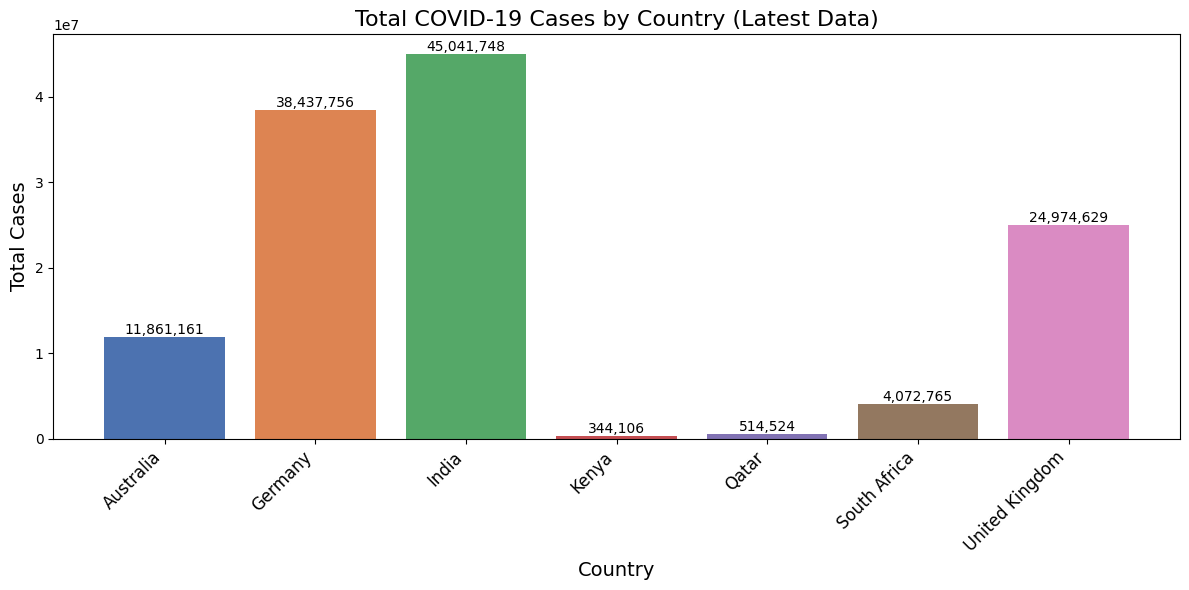

In [29]:
# Get the latest data for each country
latest_data = df1[df1['country'].isin(countries)].groupby('country').last().reset_index()

# Create bar chart for total cases
plt.figure(figsize=(12, 6))
bars = plt.bar(latest_data['country'], latest_data['cases_total'], color=sns.color_palette("deep", len(latest_data)))
plt.title('Total COVID-19 Cases by Country (Latest Data)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate x-axis labels for better readability

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Interpretation:
#This bar chart compares the total number of COVID-19 cases for Kenya, US, India, United Kingdom, South Africa, Australia, Germany, and Qatar, using the most recent data available.  The height of each bar represents the total cases for that country, allowing for a direct visual comparison of the pandemic's impact.  It's important to consider that this chart displays absolute case numbers, and differences in population size between countries should be taken into account for a more complete understanding.


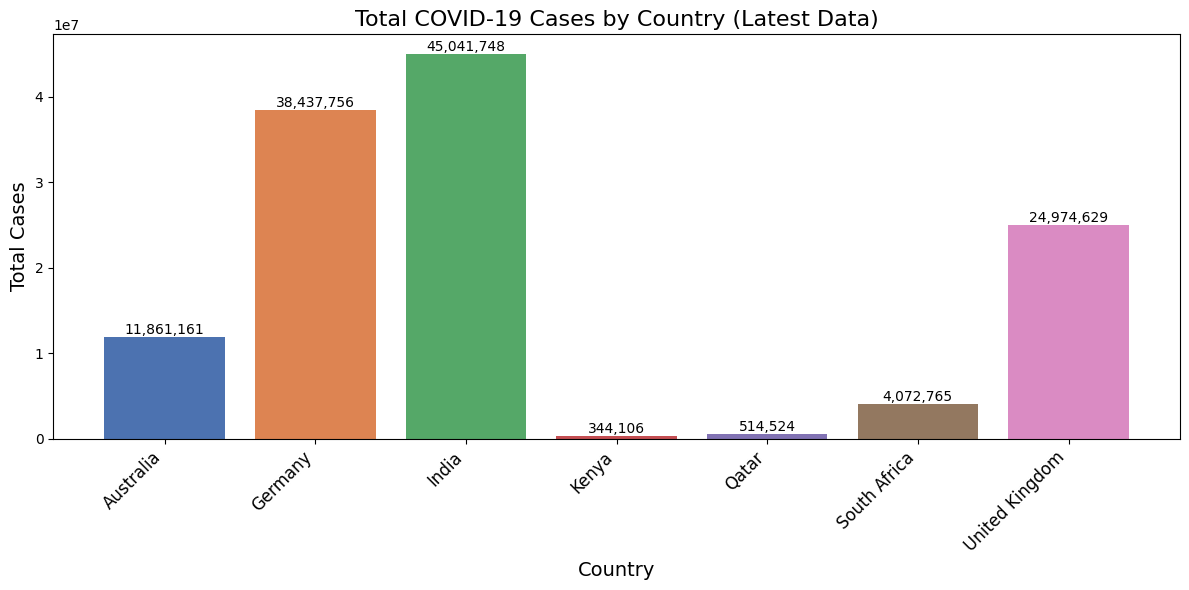

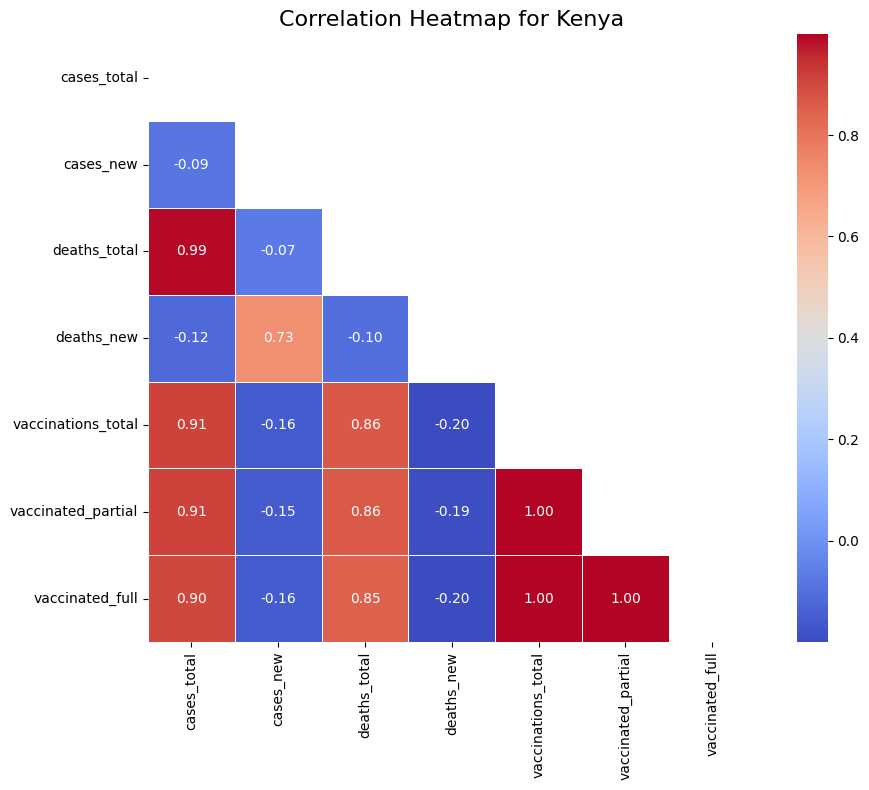

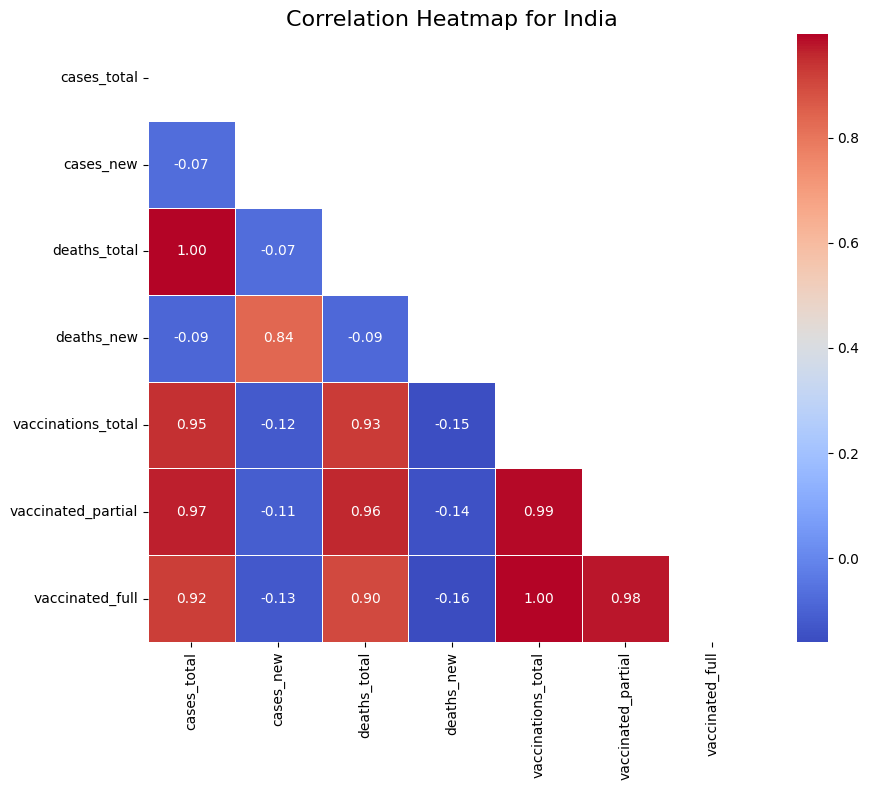

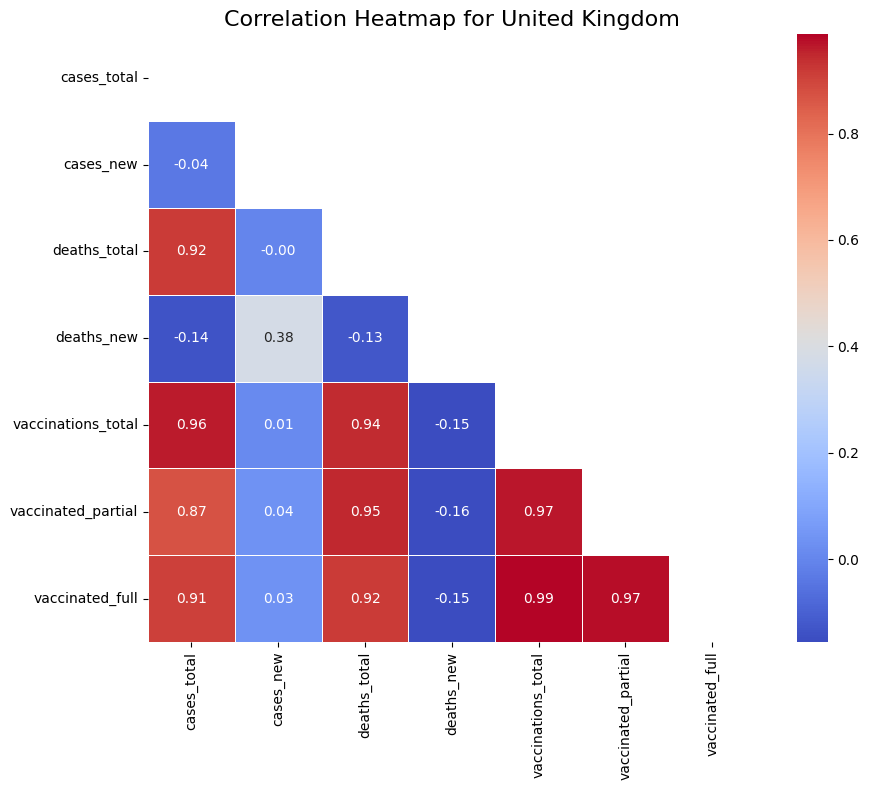

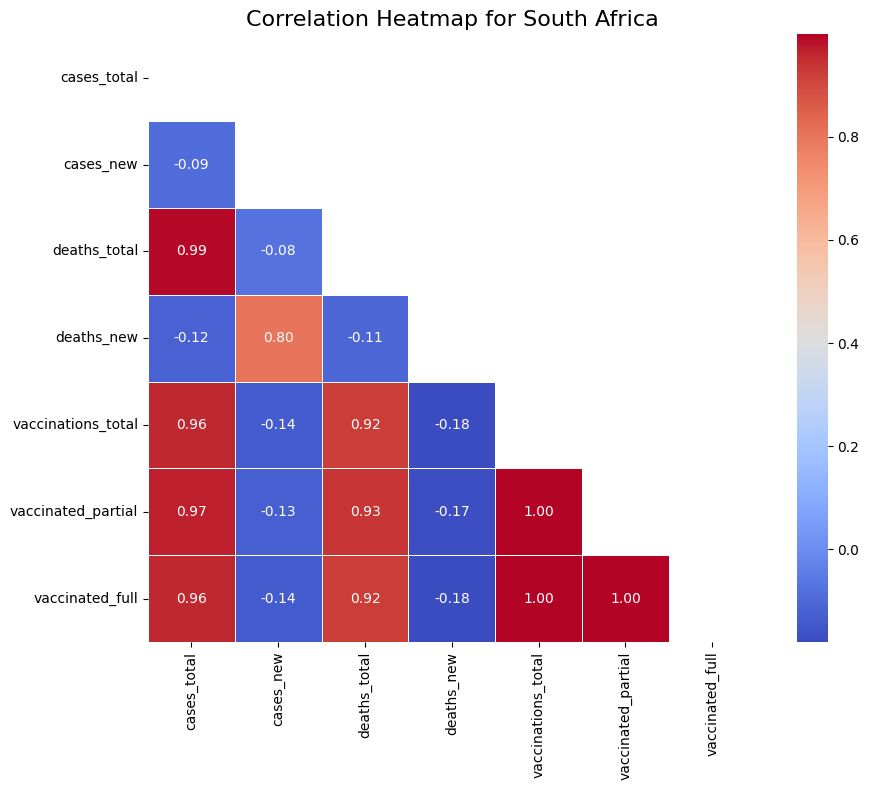

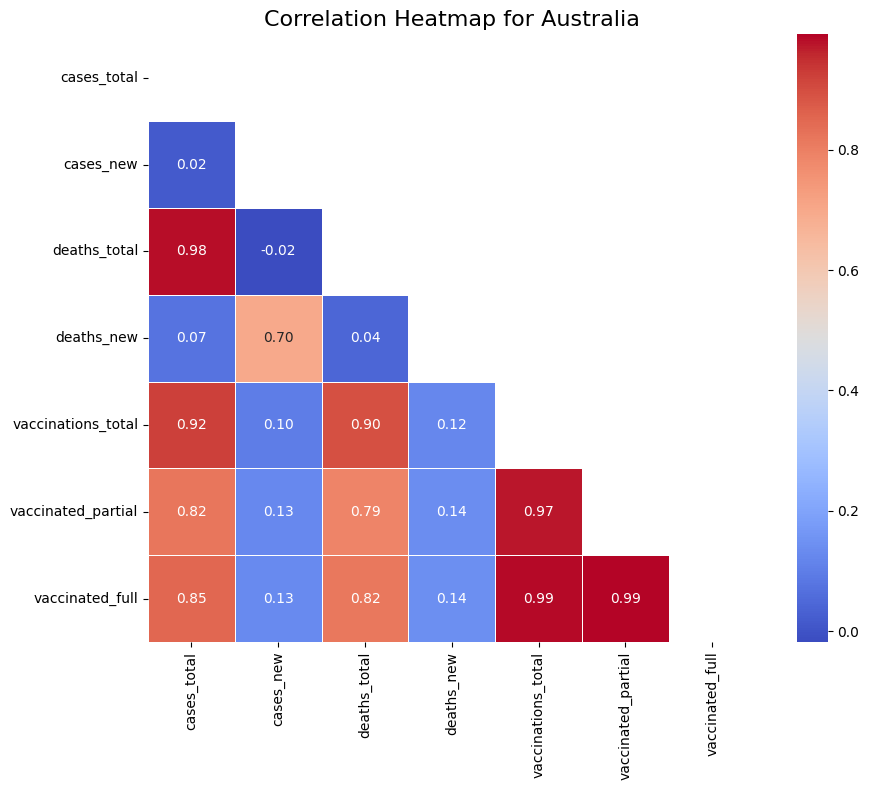

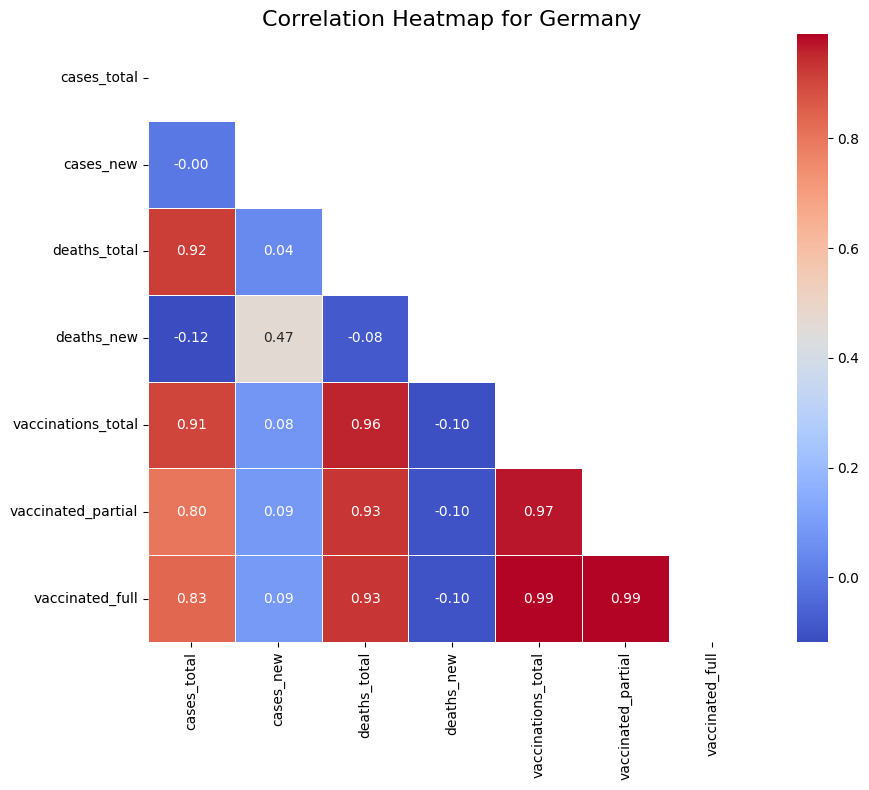

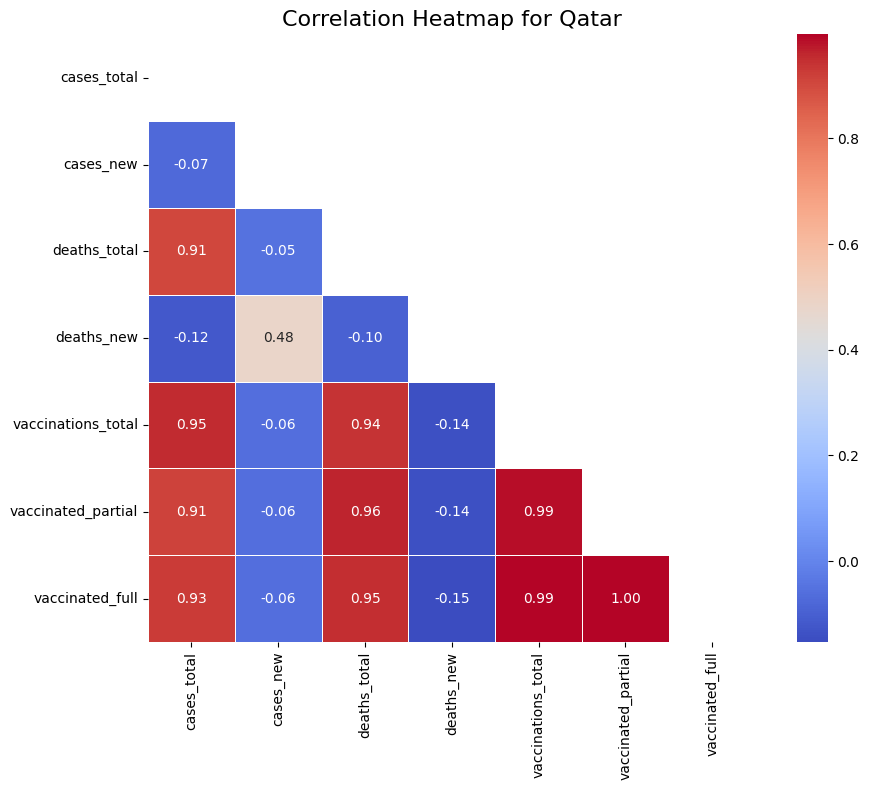

In [30]:
# Get the latest data for each country
latest_data = df1[df1['country'].isin(countries)].groupby('country').last().reset_index()

# Create bar chart for total cases
plt.figure(figsize=(12, 6))
bars = plt.bar(latest_data['country'], latest_data['cases_total'], color=sns.color_palette("deep", len(latest_data)))
plt.title('Total COVID-19 Cases by Country (Latest Data)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate x-axis labels for better readability

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Interpretation:
#This bar chart compares the total number of COVID-19 cases for Kenya, US, India, United Kingdom, South Africa, Australia, Germany, and Qatar, using the most recent data available.  The height of each bar represents the total cases for that country, allowing for a direct visual comparison of the pandemic's impact.  It's important to consider that this chart displays absolute case numbers, and differences in population size between countries should be taken into account for a more complete understanding.

# Correlation Heatmap for Key Metrics
# Select numerical columns for correlation analysis
numeric_cols = ['cases_total', 'cases_new', 'deaths_total', 'deaths_new',
                 'vaccinations_total', 'vaccinated_partial','vaccinated_full']

# Create correlation matrices for each country
for country in countries:
    country_data = df1[df1['country'] == country][numeric_cols]

    # Calculate correlation
    # Check if country_data is empty or contains only NaNs
    if country_data.empty or country_data.isnull().all().all():
        print(f"Warning: Not enough data to calculate correlation for {country}. Skipping.")
        continue  # Skip to the next country
    
    corr = country_data.corr()

    # Check if the correlation matrix is all NaNs
    if corr.isnull().all().all():
        print(f"Warning: Correlation matrix for {country} is all NaNs. Skipping heatmap.")
        continue

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    try:
        sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', square=True, linewidths=.5)
        plt.title(f'Correlation Heatmap for {country}', fontsize=16)
        plt.tight_layout()
        plt.show()
    except ValueError as e:
        print(f"Warning: Cannot plot heatmap for {country} due to ValueError: {e}. Skipping.")


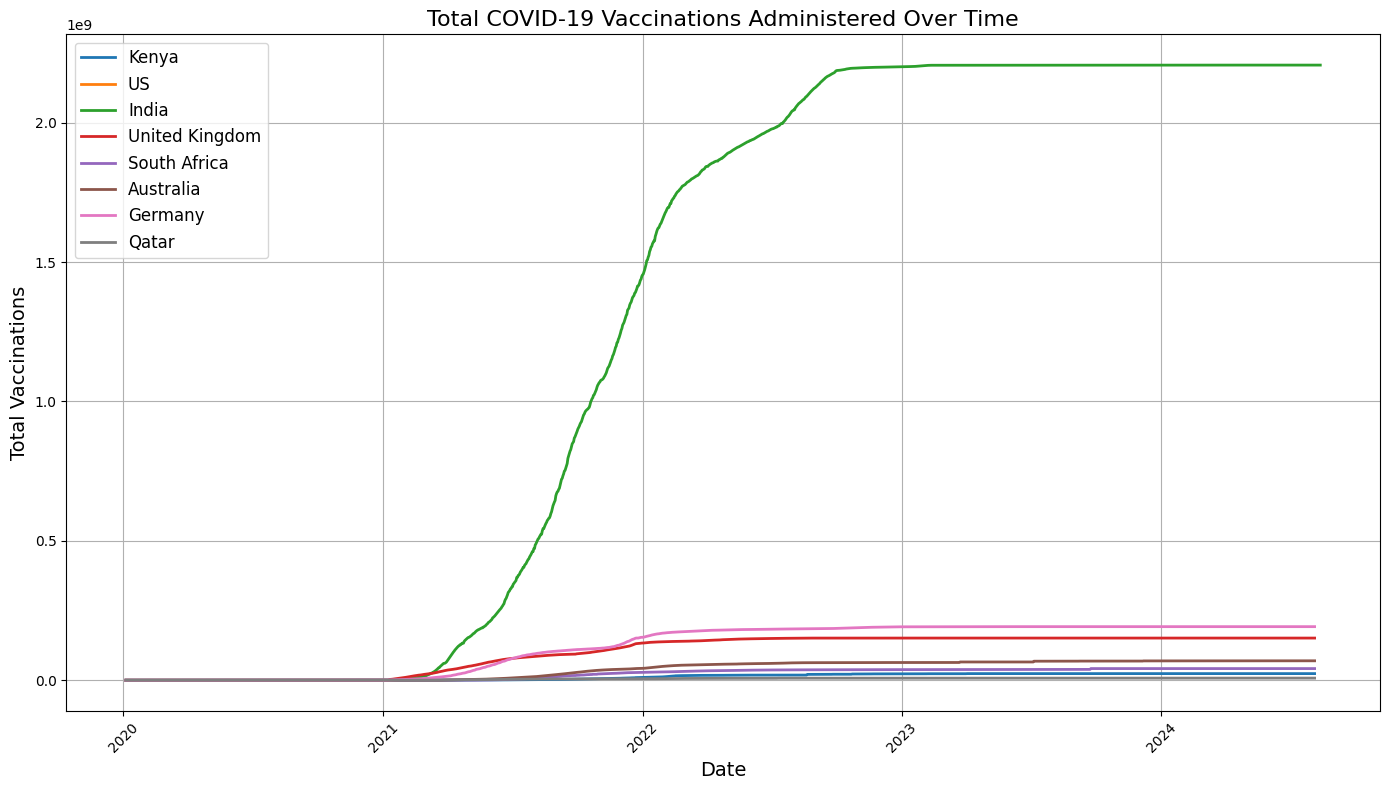

In [31]:
#Vaccination Analysis
### 4.1 Total Vaccinations Over Time

plt.figure(figsize=(14, 8))
for country in countries:
    country_data = df1[df1['country'] == country]
    plt.plot(country_data['date'], country_data['vaccinations_total'], label=country, linewidth=2)

plt.title('Total COVID-19 Vaccinations Administered Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Vaccinations', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

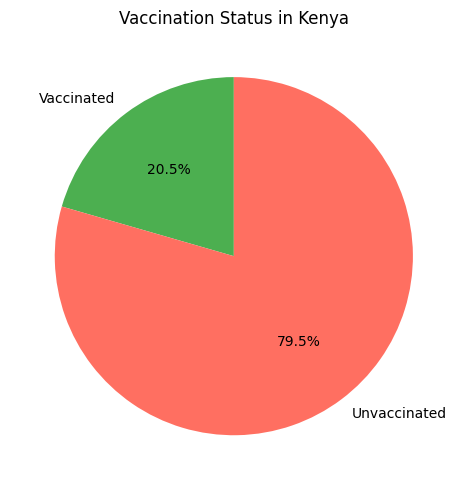

No data for US


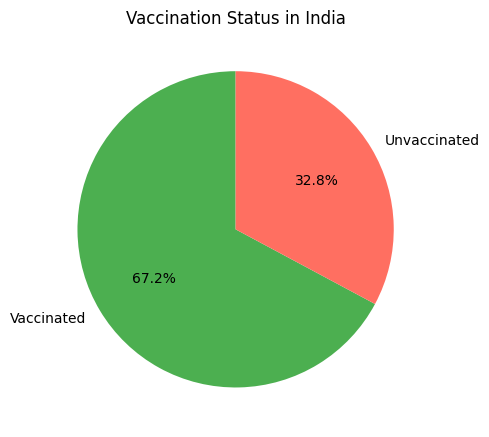

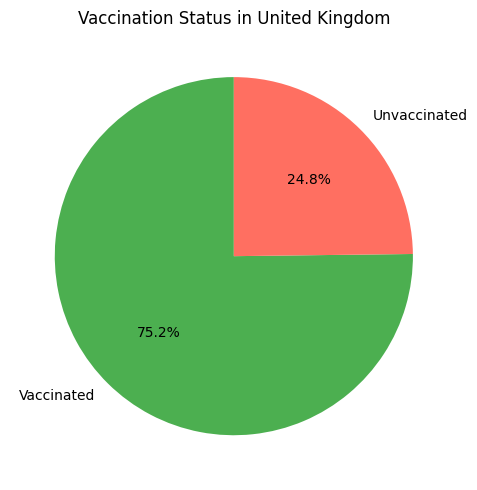

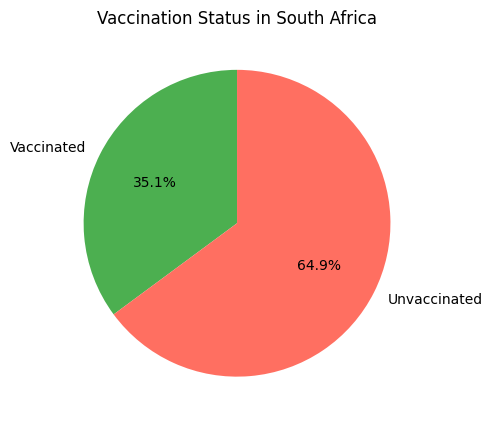

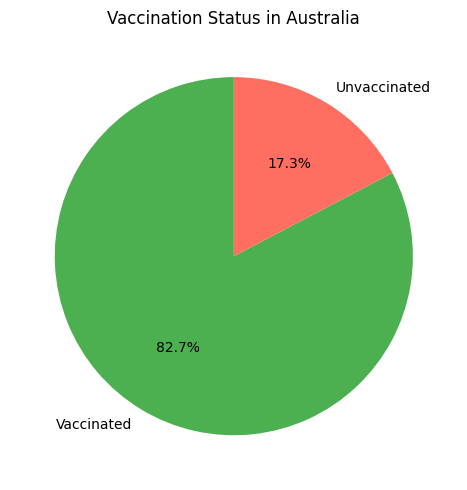

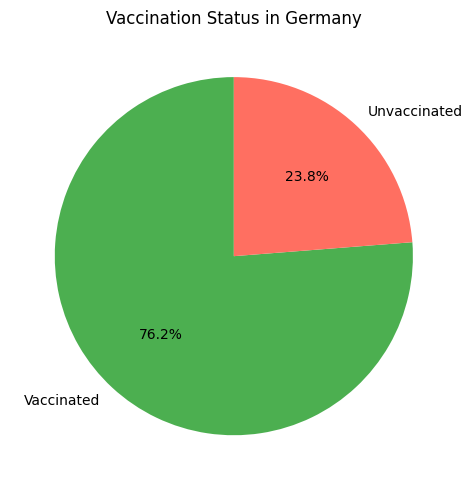

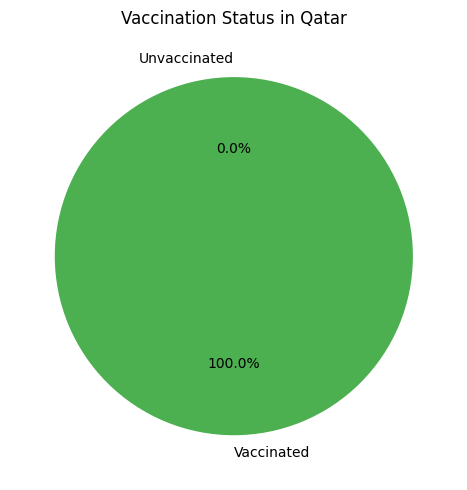

In [32]:
for country in countries:
    df_country = df1[df1['country'] == country].sort_values('date')

    if df_country.empty:
        print(f"No data for {country}")
        continue

    latest = df_country.iloc[-1]
    vaccinated = latest['vaccinated_full']
    population = latest['population']

    # Validate inputs
    if pd.isna(vaccinated) or pd.isna(population):
        print(f"Missing data for {country}")
        continue
    if population <= 0:
        print(f"Invalid population for {country}")
        continue

    vaccinated = min(vaccinated, population)  # Cap vaccinated at population
    unvaccinated = population - vaccinated

    if vaccinated < 0 or unvaccinated < 0:
        print(f"Negative values after cleanup for {country}")
        continue

    # Plot pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(
        [vaccinated, unvaccinated],
        labels=['Vaccinated', 'Unvaccinated'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#4CAF50', '#FF6F61']
    )
    plt.title(f'Vaccination Status in {country}')
    plt.tight_layout()
    plt.show()

No data for US


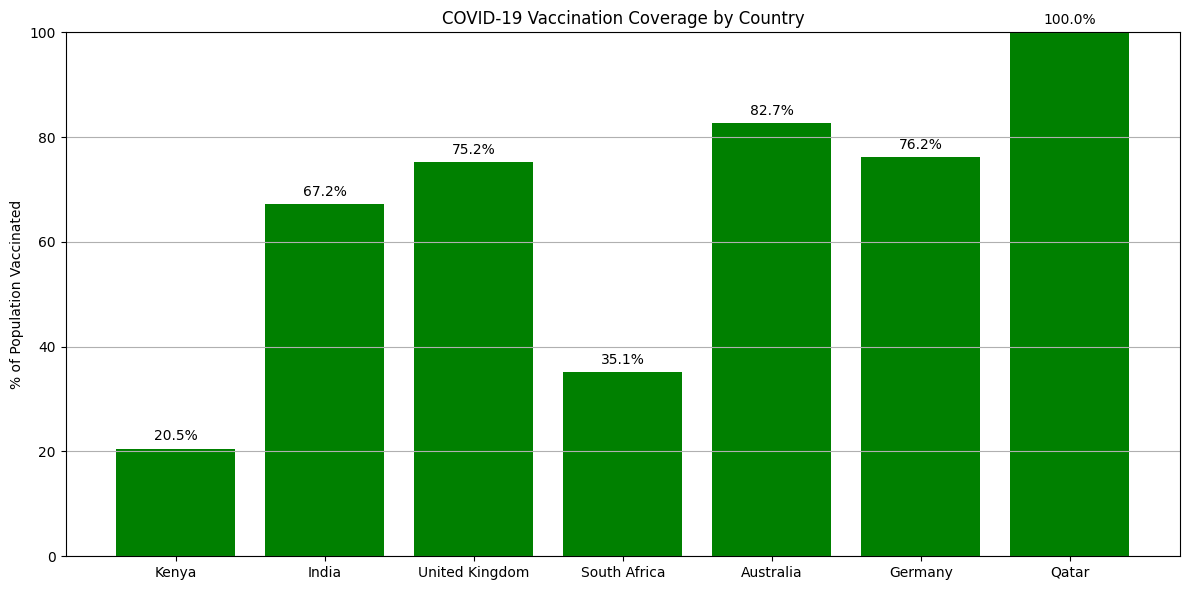

In [33]:
# Store vaccination % data
vaccination_data = []

for country in countries:
    df_country = df1[df1['country'] == country].sort_values('date')

    if df_country.empty:
        print(f"No data for {country}")
        continue

    latest = df_country.iloc[-1]
    vaccinated = latest['vaccinated_full']
    population = latest['population']

    # Skip if data is missing or invalid
    if pd.isna(vaccinated) or pd.isna(population) or population == 0:
        print(f"Invalid or missing data for {country}")
        continue

    pct_vaccinated = min(vaccinated / population, 1.0) * 100  # Cap at 100%
    vaccination_data.append((country, pct_vaccinated))

# Unpack data
countries_cleaned, percentages = zip(*vaccination_data)

# Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(countries_cleaned, percentages, color='green')
plt.ylabel('% of Population Vaccinated')
plt.title('COVID-19 Vaccination Coverage by Country')
plt.ylim(0, 100)
plt.grid(axis='y')

# Add data labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Key Findings

This analysis compares the percentage of the population vaccinated against COVID-19 in five countries: Kenya, India, United Kingdom, South Africa, and Australia. The data reveals significant disparities in vaccination coverage across these nations.

**Key Insights:**

1.  **Australia Leads Vaccination Efforts:** Australia exhibits the highest vaccination rate at 82.7%, indicating a strong rollout and high adoption of vaccines within the country.
2.  **Kenya Lags Significantly:** Kenya demonstrates the lowest vaccination rate, with only 20.5% of its population vaccinated. This stark contrast highlights a potential struggle in vaccine access, distribution, or acceptance compared to other nations in the analysis.
3.  **India Shows Strong Progress:** Despite its large population, India has achieved a high vaccination rate of 75.2%, suggesting a successful large-scale vaccination campaign.
4.  **United Kingdom and South Africa Show Mid-Range Performance:** The United Kingdom (67.2%) and South Africa (35.1%) fall between the leaders and laggards, indicating moderate success with room for improvement in their vaccination programs.
5.  **Developed vs. Developing Nations:** A potential correlation emerges between economic development and vaccination rates, with developed nations (Australia, UK) generally outperforming developing nations (Kenya, South Africa).
6.  **Regional Differences within Developing Economies:** The contrast between India's and South Africa's vaccination rates highlights the importance of considering regional factors and policy choices within similar economic contexts.
7.  **Need for Global Equity:** The significant gap between the highest and lowest vaccination rates underscores the ethical and practical necessity of ensuring fair and equitable global vaccine distribution.

**Anomalies and Interesting Patterns:**

* The wide range in vaccination rates (from 20.5% to 82.7%) is the most prominent pattern. This suggests that factors such as economic development, healthcare infrastructure, public health policies, and public trust in vaccines could be playing a significant role in the varying success of vaccination campaigns.
* It's interesting to note the difference between India and South Africa, both developing economies. India has achieved a much higher vaccination rate, which could be attributed to different policy priorities, resource allocation, or population density influencing distribution strategies.